In [85]:
#Importing Libraries
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')
# set seed for reproducibility
np.random.seed(0)

In [88]:
def read_floats_from_file(file_path):
    float_list = []
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Separar os números por espaços ou vírgulas, se necessário
                numbers = line.replace(',', ' ').split()
                
                # Converter para float e adicionar à lista
                float_list.extend(float(num) for num in numbers)
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
    
    return float_list

# Exemplo de uso
file_path = 'numeros.txt'  # Substitua pelo caminho do seu arquivo
service_times = read_floats_from_file('speed.txt')
#print(service_times)


In [103]:
#Single or multiple server queue simulation
l = 1000 # average number of arrivals per minute
µ =110.1932865 # average number of people served per minute
ncust =290# number of customers
c=10 # number of servers
#empty dictionary for computing the utilization with each configuration of servers
utilization={}

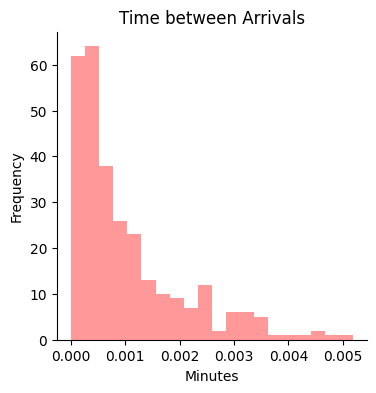

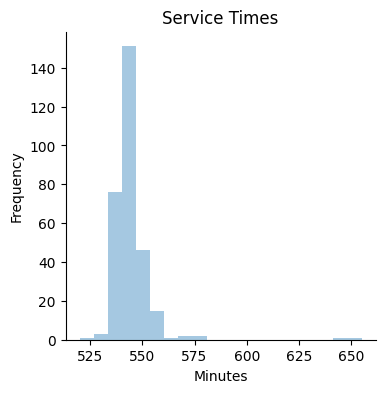

In [104]:
  #generating inter arrival times using exponential distribution
inter_arrival_times = list(np.random.exponential(scale=1/l,size=ncust))

    #plotting data
plt.figure(figsize=(4,4))
sns.distplot(inter_arrival_times,kde=False,color='r',bins=20)
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

 # Generate random service times for each customer 
#service_times = list(np.random.exponential(scale=1/µ,size=ncust))  

#service time distribution plot
plt.figure(figsize=(4,4))
sns.distplot(service_times,kde=False,bins=20)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

In [105]:
arrival_times= []# list of arrival times of a person joining the queue
#service_times = [] # list of service times once they reach the front
finish_times = [] # list of finish times after waiting and being served
      
arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]
    
arrival_times[0]=round(inter_arrival_times[0],4)#arrival of first customer
#Generate arrival times
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)
    

In [106]:
#Generating finish times
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)    
    
 # Total time spent in the system by each customer
total_times =[abs(round((finish_times[i]-arrival_times[i]),4)) for i in range(ncust)]
    
    # Time spent@waiting before being served (time spent in the queue)
wait_times = [abs(round((total_times[i] - service_times[i]),4)) for i in range(ncust)]
    

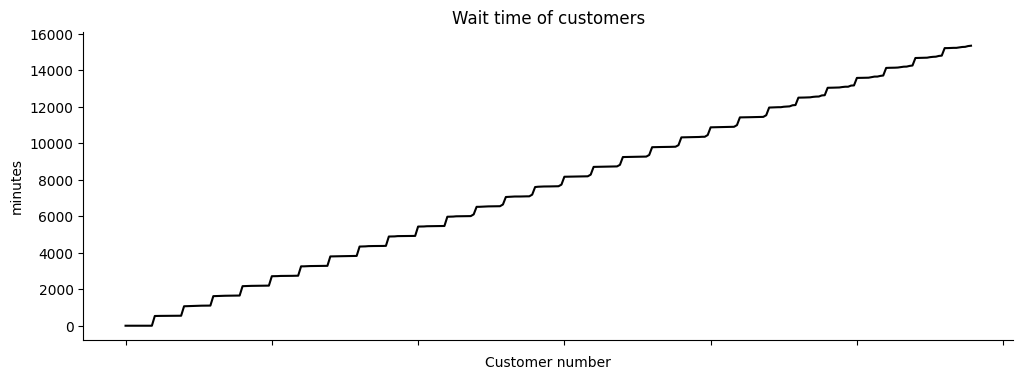

In [107]:
#plotting Wait times

plt.figure(figsize=(12,4))
sns.lineplot(x=data.index,y=wait_times,color='black').set(xticklabels=[])
plt.xlabel('Customer number')
plt.ylabel('minutes')
plt.title('Wait time of customers')
sns.despine()
plt.show()

In [108]:
 #creating a dataframe with all the data of the model
    
data = pd.DataFrame(list(zip(arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times)), 
                columns =['arrival_times','finish_times', 'service_times','total_times','wait_times','inter_arrival_times']) 

#Printing the first 5 rows of the data
data.head()

,arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times
0,0.0005,547.6680,547.667503,547.6675,0.0,0.000460
1,0.0006,539.5185,539.517880,539.5179,0.0,0.000147
2,0.0023,542.3426,542.340279,542.3403,0.0,0.001727
3,0.0025,541.0286,541.026115,541.0261,0.0,0.000211
4,0.0032,532.9560,532.952786,532.9528,0.0,0.000716


In [109]:
tbe=list([0])
timeline=['simulation starts']
for i in range(0,ncust):
    tbe.append(data['arrival_times'][i])
    tbe.append(data['finish_times'][i])
    timeline.append('customer ' +str(i+1)+' arrived')
    timeline.append('customer ' +str(i+1)+' left')
        
    
#generating a dataframe with the timeline and description of events
    
timeline = pd.DataFrame(list(zip(tbe,timeline)), 
                columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#printing the first 5 rows of the data
timeline.head()

,time,Timeline
0,0.0000,simulation starts
1,0.0005,customer 1 arrived
2,0.0006,customer 2 arrived
3,0.0023,customer 3 arrived
4,0.0025,customer 4 arrived


In [110]:
#generating the number of customers inside the system at any given time of the simulation
    
timeline['n']=0
x=0
for i in range(1,(2*ncust)-1):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='arrived':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

In [111]:
  #computing time between events
t= list()
for i in timeline.index:
    if i == (2*ncust) -2 :
        continue
    if i < 2*ncust:
        x=timeline.time[i+1]
    else:
        x=timeline.time[i]
    y=timeline.time[i]
    t.append(round((x-y),4))

t.append(0) 
timeline['tbe']=t

In [112]:
#show results
timeline.head()

,time,Timeline,n,tbe
0,0.0000,simulation starts,0,0.0005
1,0.0005,customer 1 arrived,1,0.0001
2,0.0006,customer 2 arrived,2,0.0017
3,0.0023,customer 3 arrived,3,0.0002
4,0.0025,customer 4 arrived,4,0.0007


In [113]:
  #computing the probability and time spent of 'n' customers in the system
    
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)
Tn=timeline.groupby('n').tbe.agg('count')
timeline.groupby('n').tbe.agg(sum)/sum(t)

n
0      3.157577e-08
1      6.315154e-09
2      9.913971e-04
3      6.932019e-04
4      1.270293e-03
           ...     
286    9.537778e-05
287    4.690265e-05
288    6.553236e-05
289    3.023254e-04
290    3.363841e-02
Name: tbe, Length: 291, dtype: float64

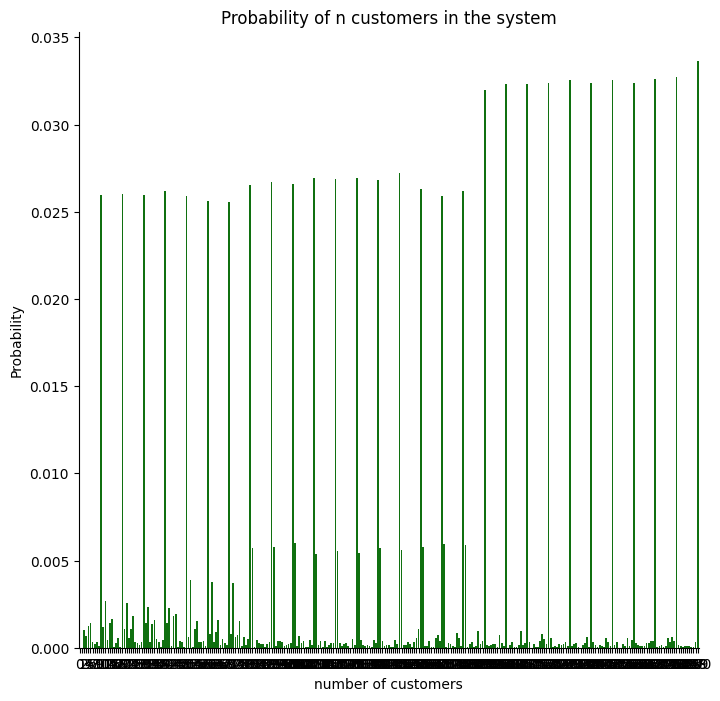

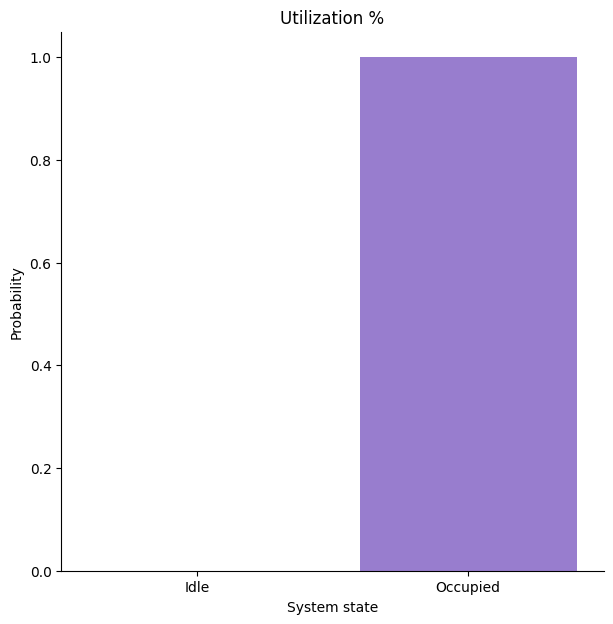

In [114]:
#plotting results
plt.figure(figsize=(8,8))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probability of n customers in the system')
plt.xlabel('number of customers')
plt.ylabel('Probability')
sns.despine()
plt.show()

plt.figure(figsize=(7,7))
sns.barplot(x=['Idle','Occupied'],y=[Pn[0],1-Pn[0]],color='mediumpurple')
plt.title('Utilization %')
plt.xlabel('System state')
plt.ylabel('Probability')
sns.despine()
plt.show()

#sns.barplot(x=df.values, y=df.index, alpha=0.8)

In [115]:
   #computing expected number of customers in the system
Ls=(sum(Pn*Pn.index))
        
    #computing expected customers waiting in line
Lq=sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    

In [116]:
# Model Results
print('Output:','\n',
     'Servers : '+str(c),'\n '
     'Time Between Arrivals : ',str(data.inter_arrival_times.mean()),'\n',
     'Service Time: (1/µ)',str(data.service_times.mean()),'\n'
     ' Utilization (c): ',str((Ls-Lq)/c),'\n',
     'Expected wait time in line (Wq):',str(data['wait_times'].mean()),'\n',
     'Expected time spent on the system (Ws):',str(data.total_times.mean()),'\n',
     'Expected number of customers in line (Lq):',str(Lq),'\n',
     'Expected number of clients in the system (Ls):',str(Ls),'\n '
     'Expected number of occupied servers :',str(Ls-Lq),'\n')

Output: 
 Servers : 10 
 Time Between Arrivals :  0.001015234967872336 
 Service Time: (1/µ) 544.6091972579311 
 Utilization (c):  0.12511320782515725 
 Expected wait time in line (Wq): 7630.486685517242 
 Expected time spent on the system (Ws): 8175.09588586207 
 Expected number of customers in line (Lq): 148.46310385908544 
 Expected number of clients in the system (Ls): 149.714235937337 
 Expected number of occupied servers : 1.2511320782515725 

